<a href="https://colab.research.google.com/github/LudovicaCi/SentimentAnalysis/blob/main/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Import


In [4]:
import pandas as pd


reviews = pd.read_csv('/content/drive/MyDrive/DataMining/Dataset/reviews_podcast.csv')

In [ ]:
import dask.dataframe as dd
import pandas as pd

# Replace 'path_to_your_file.json' with the actual path to your JSON file
path = '/content/drive/MyDrive/DataMining/Dataset/reviews.json'

# Load the JSON file into a Dask DataFrame with a chunksize of 500,000
ddf = dd.read_json(path, lines=True)

# Convert the Dask DataFrame to a Pandas DataFrame
reviews = ddf.compute()

# Now you can use the DataFrame 'reviews' as desired
print(reviews.head())  # Print the first few rows of the DataFrame

In [5]:
print(reviews.shape[0])

5607021


In [7]:
print(reviews.head())

                         podcast_id  \
0  52e3d2c4fab4e80a8bb75ad144671d96   
1  52e3d2c4fab4e80a8bb75ad144671d96   
2  52e3d2c4fab4e80a8bb75ad144671d96   
3  52e3d2c4fab4e80a8bb75ad144671d96   
4  52e3d2c4fab4e80a8bb75ad144671d96   

                                           title  \
0                                           Argh   
1           Miss gross overrated as interviewer.   
2                     I love Terri and Fresh Air   
3  Fresh Air subscription changes to Code Switch   
4                                 Climate change   

                                             content  rating        author_id  \
0  What the heck is this show? And why can’t I de...       1  a23655ce5565f32   
1  The Howard stern interview was horrible. I lea...       1  e5d461c5f91c8d2   
2  People get really pissy about this beautiful f...       5  806cc75442c8f3d   
3  I’ve been a subscriber to Fresh Air for over a...       4  3e1e7e8417a3e85   
4  Hello, my name is Lily Rudman and I am a fif

In [6]:
print(reviews.columns)

Index(['podcast_id', 'title', 'content', 'rating', 'author_id', 'created_at'], dtype='object')


# Data cleaning




*   remove empty reviews, rating and date values
*   remove duplicate review contents



In [8]:
reviews_cleaned = reviews.dropna(subset=['content', 'rating', 'created_at'])

In [ ]:
righe_con_valori_vuoti = reviews_cleaned['submission_time'].isnull()

# Visualizza le righe con valori vuoti nell'attributo specificato
righe_con_valori_vuoti_df = reviews_cleaned[righe_con_valori_vuoti]
print(righe_con_valori_vuoti_df)

Empty DataFrame
Columns: [Unnamed: 0, author_id, rating, is_recommended, helpfulness, total_feedback_count, total_neg_feedback_count, total_pos_feedback_count, submission_time, review_text, review_title, skin_tone, eye_color, skin_type, hair_color, product_id, product_name, brand_name, price_usd]
Index: []


In [12]:
print(reviews_cleaned.shape[0])

5430620


In [10]:
# Verifica la presenza di recensioni duplicate basate sul contenuto della colonna "review_content"
duplicati = reviews_cleaned.duplicated(subset=['content'], keep=False)

# Visualizza le righe duplicate (True) nel DataFrame originale
print(reviews_cleaned[duplicati])

                               podcast_id  \
19       52e3d2c4fab4e80a8bb75ad144671d96   
64       52e3d2c4fab4e80a8bb75ad144671d96   
65       52e3d2c4fab4e80a8bb75ad144671d96   
81       52e3d2c4fab4e80a8bb75ad144671d96   
109      52e3d2c4fab4e80a8bb75ad144671d96   
...                                   ...   
5606638  1b2c0e2339620feebb5327c049654e2a   
5606752  e6410ca408815fb254edbc95a182c3c4   
5606820  14fcc5d07459da655e3a4af116cf1d17   
5606960  2dd2b41126f3029088453a8273d582c8   
5606983  2dd2b41126f3029088453a8273d582c8   

                                         title  \
19                 Please fix subscribe button   
64                                          Ok   
65                                  Great Show   
81                                         Boo   
109                                  Fresh air   
...                                        ...   
5606638                            Fifty seven   
5606752  Inception was great: crashed & burned   
5606820  

In [11]:
reviews_cleaned = reviews_cleaned.drop_duplicates(subset=['content'])

In [13]:
print(reviews_cleaned.columns)

Index(['podcast_id', 'title', 'content', 'rating', 'author_id', 'created_at'], dtype='object')


In [ ]:
import pandas as pd
from dateutil import parser

# Verifica i formati delle date nella colonna "date"
date_formats = reviews_cleaned['submission_date'].apply(lambda x: parser.parse(str(x), fuzzy=True).strftime('%Y-%m-%d %H:%M:%S') if pd.notnull(x) else None)

# Visualizza tutti i formati unici delle date
unique_date_formats = set(date_formats.dropna())
print("Unique Date Formats:", unique_date_formats)

Unique Date Formats: {'2011-07-10 00:00:00', '2013-11-21 00:00:00', '2016-08-11 00:00:00', '2012-08-20 00:00:00', '2015-08-25 00:00:00', '2018-10-06 00:00:00', '2009-08-21 00:00:00', '2011-05-29 00:00:00', '2016-08-03 00:00:00', '2011-05-28 00:00:00', '2018-10-19 00:00:00', '2017-06-23 00:00:00', '2018-01-21 00:00:00', '2016-07-15 00:00:00', '2012-08-17 00:00:00', '2013-05-21 00:00:00', '2019-01-01 00:00:00', '2017-04-05 00:00:00', '2014-10-04 00:00:00', '2009-02-01 00:00:00', '2017-11-13 00:00:00', '2018-09-01 00:00:00', '2018-02-02 00:00:00', '2019-03-15 00:00:00', '2018-05-31 00:00:00', '2016-02-17 00:00:00', '2012-10-22 00:00:00', '2009-03-10 00:00:00', '2018-04-19 00:00:00', '2016-06-04 00:00:00', '2013-04-26 00:00:00', '2018-08-19 00:00:00', '2019-06-03 00:00:00', '2014-05-27 00:00:00', '2014-12-02 00:00:00', '2017-05-24 00:00:00', '2012-10-31 00:00:00', '2012-03-11 00:00:00', '2012-04-13 00:00:00', '2014-12-10 00:00:00', '2010-02-04 00:00:00', '2017-11-26 00:00:00', '2010-08-30 

In [ ]:
reviews_cleaned.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


# Data reduction


In [14]:
# List of columns to keep
columns_to_keep =['content', 'rating', 'created_at']
# Remove all columns except the specified ones
reviews = reviews_cleaned[columns_to_keep]

In [15]:
print(reviews.columns)

Index(['content', 'rating', 'created_at'], dtype='object')


In [16]:
print(reviews.shape[0])

5430620


<ipython-input-20-1aa2da892cfd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['created_at'] = pd.to_datetime(reviews['created_at'])
<ipython-input-20-1aa2da892cfd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['Year'] = reviews['created_at'].dt.year


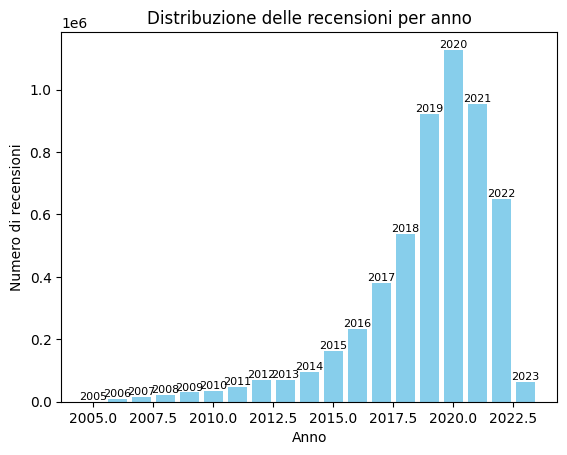

In [20]:
import matplotlib.pyplot as plt

# Converti la colonna 'created_at' in un oggetto datetime
reviews['created_at'] = pd.to_datetime(reviews['created_at'])

# Estrai l'anno dalla colonna 'created_at'
reviews['Year'] = reviews['created_at'].dt.year

# Calcola la distribuzione delle recensioni per anno
distribuzione_per_anno = reviews['Year'].value_counts().sort_index()

# Crea un grafico a barre
plt.bar(distribuzione_per_anno.index, distribuzione_per_anno.values, color='skyblue')
plt.xlabel('Anno')
plt.ylabel('Numero di recensioni')
plt.title('Distribuzione delle recensioni per anno')

# Aggiungi le etichette degli anni sopra le barre
for anno, numero_recensioni in zip(distribuzione_per_anno.index, distribuzione_per_anno.values):
    plt.text(anno, numero_recensioni + 0.1, str(anno), ha='center', va='bottom', fontsize=8, color='black')

plt.show()

In [23]:
import pandas as pd

# Seleziona solo le recensioni dell'anno 2020 e le colonne 'content' e 'rating'
reviews_2020 = reviews.loc[reviews['Year'] == 2020, ['content', 'rating']].copy()

In [29]:
print(reviews_2020.shape[0])

1127656


In [30]:
# Sostituisci 'df_anno_2020.csv' con il percorso e il nome del file desiderato
reviews_2020.to_csv('/content/drive/MyDrive/DataMining/Dataset/reviews_podcast_2020.csv', index=False)